# 5. Приближённое решение задачи Коши для обыкновенного дифференциального уравнения

Методами Эйлера, Рунге — Кутта четвертого порядка точности и методом Адамса третьего порядка найти приближённое решение задачи Коши для обыкновенного дифференциального уравнения на отрезке \([0,1]\). Шаг сетки \(h = 0.05\). Начало расчёта — точка \(x = 0\). Используя расчёт на грубой сетке \(c \, h = 0.1\), найти оценку точности по Рунге для половины узлов подробной сетки (только для решения, полученного с четвертым порядком точности по методу Рунге-Кутты). Для сравнения приведено точное решение \(u_0(x)\).

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [125]:
a, b = 0, 1
x0 = a
Y0 = np.array([0, 1])

def F(x, Y):
    return np.array([Y[1], -np.tan(x)*Y[1] + (2*x/np.cos(x))*Y[0] + 2 - (2*x**3)/np.cos(x)])

def u0(x):
    return np.sin(x) + x**2

In [126]:
def euler(F, x: np.ndarray, Y0: np.ndarray) -> np.ndarray:
    n = x.shape[0] - 1
    Y = [Y0]

    for i in range(n):
        h = x[i+1] - x[i]
        
        Y.append(Y[-1] + h*F(x[i], Y[-1]))
    
    return np.array(Y)

def runge_kutta_4(F, x: np.ndarray, Y0: np.ndarray) -> np.ndarray:
    n = x.shape[0] - 1
    Y = [Y0]

    for i in range(n):
        h = x[i+1] - x[i]
        k1 = h*F(x[i], Y[-1])
        k2 = h*F(x[i] + h/2, Y[-1] + k1/2)
        k3 = h*F(x[i] + h/2, Y[-1] + k2/2)
        k4 = h*F(x[i] + h, Y[-1] + k3)

        Y.append(Y[-1] + (k1 + 2*k2 + 2*k3 + k4)/6)

    return np.array(Y)

def adam_3(F, x: np.ndarray, Y0: np.ndarray) -> np.ndarray:
    """
    x must be a even grid!
    """
    n = x.shape[0] - 1
    Y = runge_kutta_4(F, x[:3], Y0).tolist()

    for i in range(2, n):
        h = x[i+1] - x[i]
        fn = F(x[i], Y[-1])
        fn1 = F(x[i-1], Y[-2])
        fn2 = F(x[i-2], Y[-3])
        
        Y.append(Y[-1] + h/12*(23*fn - 16*fn1 + 5*fn2))

    return np.array(Y)


In [127]:
h = 0.05
grid = np.linspace(a, b, int((b - a)/h + 1))
euler_res = euler(F, grid, Y0)
runge_kutta_res = runge_kutta_4(F, grid, Y0)
adam_res = adam_3(F, grid, Y0)

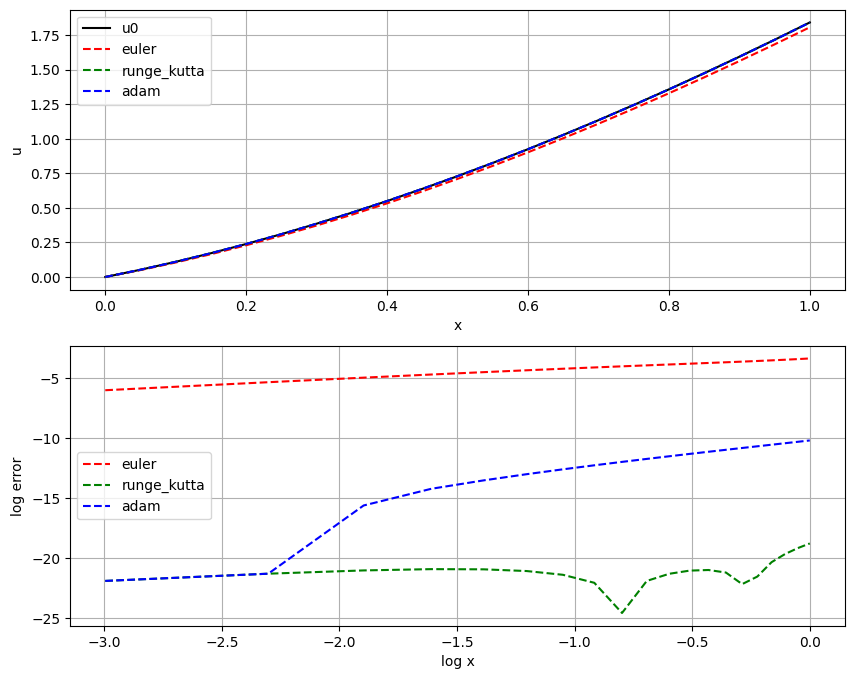

In [128]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(grid, u0(grid), label='u0', c='black')
plt.plot(grid, euler_res[:, 0], label='euler', linestyle='--', c='r')
plt.plot(grid, runge_kutta_res[:, 0], label='runge_kutta', linestyle='--', c='g')
plt.plot(grid, adam_res[:, 0], label='adam', linestyle='--', c='b')

plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - euler_res[1:, 0]) + 1e-16), label='euler', linestyle='--', c='r')
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - runge_kutta_res[1:, 0]) + 1e-16), label='runge_kutta', linestyle='--', c='g')
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - adam_res[1:, 0]) + 1e-16), label='adam', linestyle='--', c='b')

plt.xlabel('log x')
plt.ylabel('log error')
plt.grid(True)
plt.legend()

plt.show()

100%|██████████| 50/50 [00:01<00:00, 30.56it/s] 


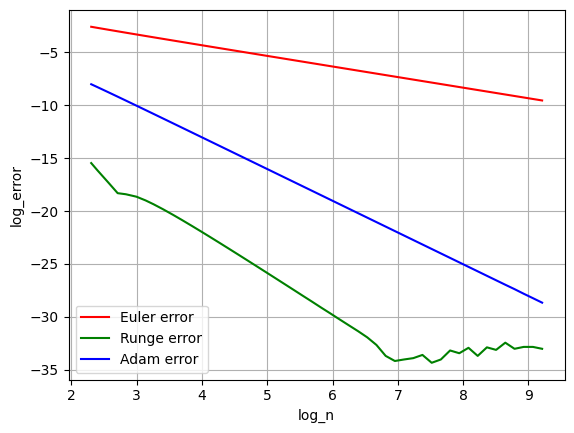

In [129]:
n_history = []
euler_error_history = []
runge_error_history = []
adam_error_history = []

for n in tqdm(np.logspace(1, 4, num=50, base=10).astype(int)):
    grid = np.linspace(a, b, n)
    u_grid = u0(grid)

    n_history.append(n)
    euler_res = euler(F, grid, Y0)
    runge_kutta_res = runge_kutta_4(F, grid, Y0)
    adam_res = adam_3(F, grid, Y0)
    euler_error_history.append(abs(u_grid - euler_res[:, 0]).max())
    runge_error_history.append(abs(u_grid - runge_kutta_res[:, 0]).max())
    adam_error_history.append(abs(u_grid - adam_res[:, 0]).max())

n_history = np.array(n_history)
euler_error_history = np.array(euler_error_history)
runge_error_history = np.array(runge_error_history)
adam_error_history = np.array(adam_error_history)

plt.plot(np.log(n_history), np.log(euler_error_history + 1e-16), color='red', label="Euler error")
plt.plot(np.log(n_history), np.log(runge_error_history + 1e-16), color='green', label="Runge error")
plt.plot(np.log(n_history), np.log(adam_error_history + 1e-16), color='blue', label="Adam error")
plt.xlabel("log_n")
plt.ylabel("log_error")
plt.grid(True)
plt.legend()

plt.show()


In [130]:
a, b = 0, 30
x0 = 0
Y0 = np.array([1, 0])

def F(x, Y):
    return np.array([Y[1], -0.2*Y[1] - 9*Y[0] + 2*np.sin(2*x)])

def u0(x):
    return (np.e**(-0.1*x))*(1.0318*np.cos(2.99666*x)-0.23079*np.sin(2.99666*x))-0.03180*np.cos(2*x)+0.39746*np.sin(2*x)


In [131]:
h = 0.01
grid = np.linspace(a, b, int((b - a)/h + 1))
euler_res = euler(F, grid, Y0)
runge_kutta_res = runge_kutta_4(F, grid, Y0)
adam_res = adam_3(F, grid, Y0)

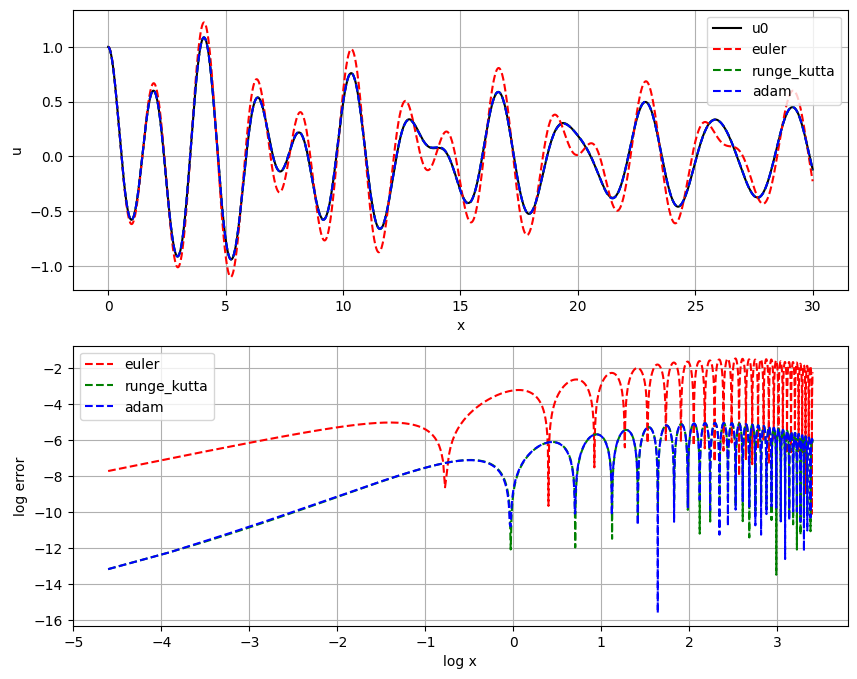

In [132]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(grid, u0(grid), label='u0', c='black')
plt.plot(grid, euler_res[:, 0], label='euler', linestyle='--', c='r')
plt.plot(grid, runge_kutta_res[:, 0], label='runge_kutta', linestyle='--', c='g')
plt.plot(grid, adam_res[:, 0], label='adam', linestyle='--', c='b')

plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - euler_res[1:, 0]) + 1e-16), label='euler', linestyle='--', c='r')
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - runge_kutta_res[1:, 0]) + 1e-16), label='runge_kutta', linestyle='--', c='g')
plt.plot(np.log(grid[1:] + 1e-16), np.log(abs(u0(grid)[1:] - adam_res[1:, 0]) + 1e-16), label='adam', linestyle='--', c='b')

plt.xlabel('log x')
plt.ylabel('log error')
plt.grid(True)
plt.legend()

plt.show()